In [79]:
%run experiments/sepsis_membership_inference.py

In [2]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

pd.set_option("display.max_columns", None)

In [3]:
model_1 = joblib.load('output/pipeline_sepsis_cases_1.pkl')
model_2 = joblib.load('output/pipeline_sepsis_cases_2.pkl')
model_3 = joblib.load('output/pipeline_sepsis_cases_4.pkl')

D:\Users\patry\anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator FeatureUnion from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
D:\Users\patry\anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator Pipeline from version 0.23.2 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [4]:
attack_model_1 = joblib.load('output/attack_model_1.pkl')
attack_model_2 = joblib.load('output/attack_model_2.pkl')
attack_model_3 = joblib.load('output/attack_model_3.pkl')

attack_model_4 = joblib.load('output/attack_model_4.pkl')
attack_model_5 = joblib.load('output/attack_model_5.pkl')
attack_model_6 = joblib.load('output/attack_model_6.pkl')

attack_model_7 = joblib.load('output/attack_model_7.pkl')
attack_model_8 = joblib.load('output/attack_model_8.pkl')
attack_model_9 = joblib.load('output/attack_model_9.pkl')

In [5]:
sepsis_data_train_1, sepsis_data_test_1 = dataset_manager_sepsis.split_data_strict(DatasetManager("sepsis_cases_1").read_dataset(), 0.5, split="temporal")
sepsis_data_train_2, sepsis_data_test_2 = dataset_manager_sepsis.split_data_strict(DatasetManager("sepsis_cases_2").read_dataset(), 0.5, split="temporal")
sepsis_data_train_3, sepsis_data_test_3 = dataset_manager_sepsis.split_data_strict(DatasetManager("sepsis_cases_4").read_dataset(), 0.5, split="temporal")

In [6]:
test_in_1 = sepsis_data_train_1.groupby("Case ID").apply(apply_key, key = "label", value = "deviant")
test_out_1 = sepsis_data_test_1.groupby("Case ID").apply(apply_key, key = "label", value = "regular")

test_in_2 = sepsis_data_train_2.groupby("Case ID").apply(apply_key, key = "label", value = "deviant")
test_out_2 = sepsis_data_test_2.groupby("Case ID").apply(apply_key, key = "label", value = "regular")

test_in_3 = sepsis_data_train_3.groupby("Case ID").apply(apply_key, key = "label", value = "deviant")
test_out_3 = sepsis_data_test_3.groupby("Case ID").apply(apply_key, key = "label", value = "regular")

In [7]:
attack_test_set_1 = pd.concat([test_in_1, test_out_1],ignore_index=True).sort_values("Case ID", ascending=True, kind="mergesort").reset_index(drop=True)
attack_test_set_2 = pd.concat([test_in_2, test_out_2],ignore_index=True).sort_values("Case ID", ascending=True, kind="mergesort").reset_index(drop=True)
attack_test_set_3 = pd.concat([test_in_3, test_out_3],ignore_index=True).sort_values("Case ID", ascending=True, kind="mergesort").reset_index(drop=True)

In [8]:
test_y_all_1, preds_all_1, probs_all_1 = test_attack_model(attack_test_set_1, attack_model_1, model_1, 0.5)
test_y_all_2, preds_all_2, probs_all_2 = test_attack_model(attack_test_set_2, attack_model_2, model_2, 0.5)
test_y_all_3, preds_all_3, probs_all_3 = test_attack_model(attack_test_set_3, attack_model_3, model_3, 0.5)

In [9]:
test_y_all_4, preds_all_4, probs_all_4 = test_attack_model(attack_test_set_1, attack_model_4, model_1, 0.5)
test_y_all_5, preds_all_5, probs_all_5 = test_attack_model(attack_test_set_2, attack_model_5, model_2, 0.5)
test_y_all_6, preds_all_6, probs_all_6 = test_attack_model(attack_test_set_3, attack_model_6, model_3, 0.5)

In [10]:
test_y_all_7, preds_all_7, probs_all_7 = test_attack_model(attack_test_set_1, attack_model_7, model_1, 0.5)
test_y_all_8, preds_all_8, probs_all_8 = test_attack_model(attack_test_set_2, attack_model_8, model_2, 0.5)
test_y_all_9, preds_all_9, probs_all_9 = test_attack_model(attack_test_set_3, attack_model_9, model_3, 0.5)

In [24]:
test_all = [test_y_all_1, test_y_all_2, test_y_all_3, 
            test_y_all_4, test_y_all_5, test_y_all_6,
            test_y_all_7, test_y_all_8 ,test_y_all_9]

preds_all = [preds_all_1, preds_all_2, preds_all_3, 
             preds_all_4, preds_all_5, preds_all_6, 
             preds_all_7, preds_all_8, preds_all_9]

In [31]:
recall = []
precision = []
f1 = []
accuracy = []

for i in range(9):
    test = test_all[i]
    pred = preds_all[i]
    
    recall.append(sklearn.metrics.recall_score(test, pred, average="binary"))
    precision.append(sklearn.metrics.precision_score(test, pred, average="binary"))
    f1.append(sklearn.metrics.f1_score(test, pred, average="binary"))
    accuracy.append(sklearn.metrics.accuracy_score(test, pred))
    

In [34]:
avg_recall = []
avg_precision = []
avg_f1 = []
avg_accuracy = []

for i in range(3):
    avg_recall.append((recall[i] + recall[i+3] + recall[i+6])/3)
    avg_precision.append((precision[i] + precision[i+3] + precision[i+6])/3)
    avg_f1.append((f1[i] + f1[i+3] + f1[i+6])/3)
    avg_accuracy.append((accuracy[i] + accuracy[i+3] + accuracy[i+6])/3)

In [39]:
print(avg_recall)
print(avg_precision)
print(avg_f1)
print(avg_accuracy)

[0.8516624040920716, 0.8516624040920716, 0.8516624040920716]
[0.7029090197957061, 0.7163018253939977, 0.7116805341045063]
[0.7695283373467466, 0.7774191107918753, 0.7735328059058545]
[0.7438192668371696, 0.7549019607843137, 0.7476555839727195]


In [73]:
precision_scores_1, recall_scores_1 = compute_precision_recall_curve(test_y_all_1, probs_all_1)
precision_scores_2, recall_scores_2 = compute_precision_recall_curve(test_y_all_2, probs_all_2)
precision_scores_3, recall_scores_3 = compute_precision_recall_curve(test_y_all_3, probs_all_3)

precision_scores_4, recall_scores_4 = compute_precision_recall_curve(test_y_all_4, probs_all_4)
precision_scores_5, recall_scores_5 = compute_precision_recall_curve(test_y_all_5, probs_all_5)
precision_scores_6, recall_scores_6 = compute_precision_recall_curve(test_y_all_6, probs_all_6)

precision_scores_7, recall_scores_7 = compute_precision_recall_curve(test_y_all_7, probs_all_7)
precision_scores_8, recall_scores_8 = compute_precision_recall_curve(test_y_all_8, probs_all_8)
precision_scores_9, recall_scores_9 = compute_precision_recall_curve(test_y_all_9, probs_all_9)

D:\Users\patry\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Users\patry\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Users\patry\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Users\patry\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision 

In [74]:
precision_scores = [precision_scores_1, precision_scores_2, precision_scores_3, 
                    precision_scores_4, precision_scores_5, precision_scores_6,
                    precision_scores_7, precision_scores_8 ,precision_scores_9]

recall_scores = [recall_scores_1, recall_scores_2, recall_scores_3, 
                 recall_scores_4, recall_scores_5, recall_scores_6, 
                 recall_scores_7, recall_scores_8, recall_scores_9]

In [75]:
avg_precision_scores_1 = (np.array(precision_scores_1) + np.array(precision_scores_4) + np.array(precision_scores_7)) / 3
avg_precision_scores_2 = (np.array(precision_scores_2) + np.array(precision_scores_5) + np.array(precision_scores_8)) / 3
avg_precision_scores_3 = (np.array(precision_scores_3) + np.array(precision_scores_6) + np.array(precision_scores_9)) / 3

In [76]:
avg_recall_scores_1 = (np.array(recall_scores_1) + np.array(recall_scores_4) + np.array(recall_scores_7)) / 3
avg_recall_scores_2 = (np.array(recall_scores_2) + np.array(recall_scores_5) + np.array(recall_scores_8)) / 3
avg_recall_scores_3 = (np.array(recall_scores_3) + np.array(recall_scores_6) + np.array(recall_scores_9)) / 3

In [91]:
avg_precision_scores_1[0] = 0
avg_precision_scores_2[0] = 0
avg_precision_scores_3[0] = 0

In [92]:
avg_precision_scores_1[len(avg_precision_scores_1)-1] = 1
avg_precision_scores_2[len(avg_precision_scores_2)-1] = 1
avg_precision_scores_3[len(avg_precision_scores_3)-1] = 1

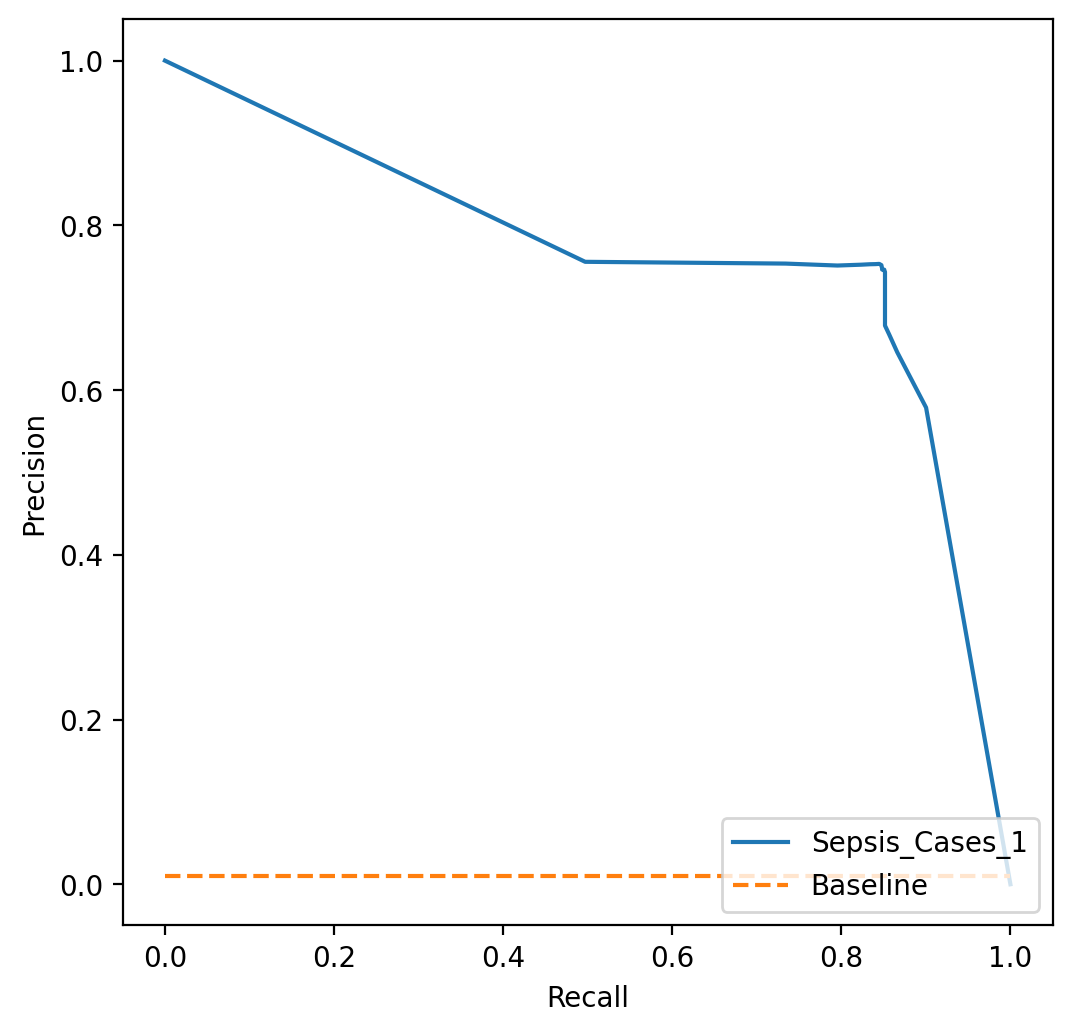

In [93]:
plot_precision_recall_curve(avg_recall_scores_1, avg_precision_scores_1, "Sepsis_Cases_1")

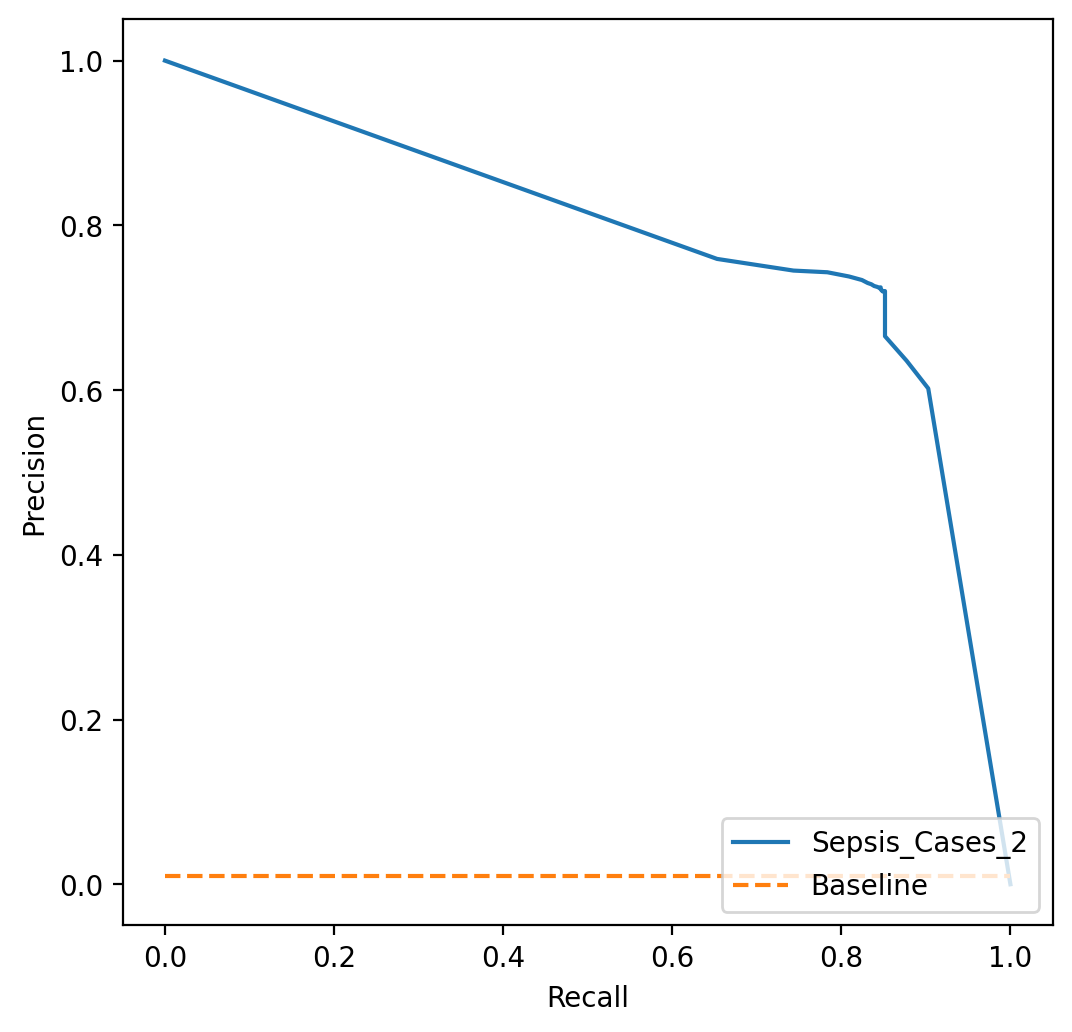

In [94]:
plot_precision_recall_curve(avg_recall_scores_2, avg_precision_scores_2, "Sepsis_Cases_2")

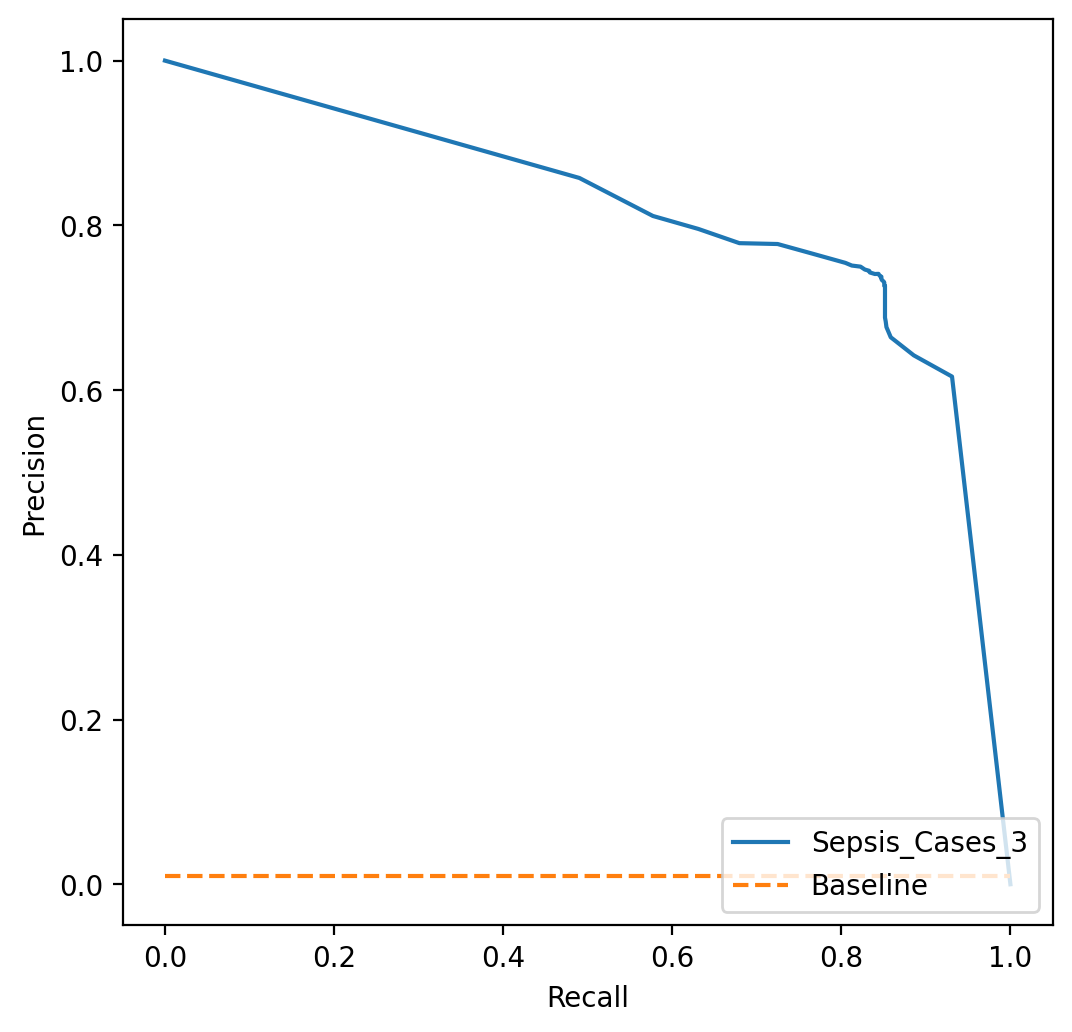

In [95]:
plot_precision_recall_curve(avg_recall_scores_3, avg_precision_scores_3, "Sepsis_Cases_3")